In [7]:
#FINANCE HOMEWORK 1 - SP&500
#DANDI CHEN, PUJA SUBRAMANIAM, DERRICK HUNG

#import
from pandas import Series, DataFrame
import pandas as pd
import re
from datetime import datetime
import copy
%pylab inline

#read in data and clean columns
raw = pd.read_csv('StockData.csv')
df = raw[['date','TICKER','Bid','Ask','Price','Volume','Share Outstanding','Spread',\
                 'Value Weighted Return (w dist)','Value Weighted Return (exc dividends)']]
df['date'] = pd.to_datetime(raw['date'],format='%Y%m%d')
df.sort_values(by='date')



Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,date,TICKER,Bid,Ask,Price,Volume,Share Outstanding,Spread,Value Weighted Return (w dist),Value Weighted Return (exc dividends)
0,2008-12-31,EWST,6.79500,8.26000,8.26000,1292.0,4297.0,NaN,0.022154,0.019087
634951,2008-12-31,DPZ,3.17000,4.71000,4.71000,100186.0,56785.0,NaN,0.022154,0.019087
634950,2008-12-31,EGR,0.08000,0.10980,NaN,11659.0,31131.0,NaN,0.022154,0.019087
634829,2008-12-31,GLV,9.03000,10.69000,10.69000,11148.0,10435.0,NaN,0.022154,0.019087
634790,2008-12-31,INHX,0.21000,0.34000,0.26120,50415.0,43381.0,NaN,0.022154,0.019087
634725,2008-12-31,XRTX,1.76000,2.95000,2.95000,45771.0,29298.0,NaN,0.022154,0.019087
634685,2008-12-31,WCAA,2.35000,3.88000,2.51000,3563.0,17399.0,NaN,0.022154,0.019087
634565,2008-12-31,SNMX,2.40000,2.79000,2.79000,17480.0,30670.0,NaN,0.022154,0.019087
634444,2008-12-31,MNTA,7.91000,11.90000,11.60000,53518.0,39691.0,NaN,0.022154,0.019087
634352,2008-12-31,MFLX,9.38000,11.69000,11.69000,26678.0,25155.0,NaN,0.022154,0.019087


In [8]:
#create month and year as columns 

df['month'] = (df['date'].dt.to_period("M").astype(str))
df['year'] = df['date'].dt.to_period('Y').astype(str)
#create market cap for every ticker for every month
df['market cap'] = df['Share Outstanding']*df['Price']
df



/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,TICKER,Bid,Ask,Price,Volume,Share Outstanding,Spread,Value Weighted Return (w dist),Value Weighted Return (exc dividends),month,year,market cap
0,2008-12-31,EWST,6.79500,8.26000,8.26000,1292.0,4297.0,NaN,0.022154,0.019087,2008-12,2008,3.549322e+04
1,2009-01-30,EWST,8.27000,8.98990,8.50200,695.0,4297.0,NaN,-0.077315,-0.078709,2009-01,2009,3.653309e+04
2,2009-02-27,EWST,8.15000,8.94000,8.94000,412.0,4297.0,NaN,-0.100271,-0.103457,2009-02,2009,3.841518e+04
3,2009-03-31,EWST,7.02000,8.20000,8.18000,979.0,4300.0,NaN,0.086748,0.083489,2009-03,2009,3.517400e+04
4,2009-04-30,EWST,7.68000,8.85000,8.50000,828.0,4300.0,NaN,0.109352,0.107516,2009-04,2009,3.655000e+04
5,2009-05-29,EWST,8.40000,9.08900,8.48000,825.0,4354.0,NaN,0.067774,0.065124,2009-05,2009,3.692192e+04
6,2009-06-30,EWST,8.16000,9.02500,8.59990,1122.0,4301.0,NaN,-0.003099,-0.005042,2009-06,2009,3.698817e+04
7,2009-07-31,EWST,8.10750,8.94220,8.15000,1441.0,4301.0,NaN,0.081752,0.080331,2009-07,2009,3.505315e+04
8,2009-08-31,EGAS,8.05000,8.75000,8.54000,1474.0,4302.0,NaN,0.031469,0.029310,2009-08,2009,3.673908e+04
9,2009-09-30,EGAS,8.17000,8.63000,8.59990,1960.0,4303.0,NaN,0.045216,0.043576,2009-09,2009,3.700537e+04


In [9]:
#get current year tickers list from last month of previous year
mask = (df['year'] =='2008')
df2 = df[mask]
list2009 = df2.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()
#get the current year data that are in the top 500 list
mask2 = (df['year']=='2009')
mask3 = (df['TICKER'].isin(list2009))
df3 = df[mask2&mask3]
#grouby date
sp2009 = df3.groupby(['date'])[['market cap']].sum()
sp500_total = sp2009


In [10]:
#get current year tickers list from last month of previous year
mask4 = (df['month'] == '2009-12')
df4 = df[mask4]
list2010 = df4.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()

#get the current year data that are in the top 500 list
mask5 = (df['year']=='2010')
mask6 = (df['TICKER'].isin(list2010))
df5 = df[mask5&mask6]
sp2010 = df5.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2010)
sp500_total

,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [11]:
#get current year tickers list from last month of previous year
mask7 = (df['month'] == '2010-12')
df6 = df[mask7]
list2011 = df6.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()

#get the current year data that are in the top 500 list
mask8 = (df['year']=='2011')
mask9 = (df['TICKER'].isin(list2011))
df7 = df[mask8&mask9]
sp2011 = df7.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2011)
sp500_total

,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [12]:
#get 2012 ticker 
mask10 = (df['month'] == '2011-12')
df8 = df[mask10]
list2011 = df6.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()

#get the current year data that are in the top 500 list
mask11 = (df['year']=='2012')
mask12 = (df['TICKER'].isin(list2011))
df9 = df[mask11&mask12]
sp2012 = df9.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2012)
sp500_total


,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [13]:
#get 2013 ticker 
mask13 = (df['month'] == '2012-12')
df10 = df[mask13]
list2011 = df10.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()

#get the current year data that are in the top 500 list
mask14 = (df['year']=='2013')
mask15 = (df['TICKER'].isin(list2011))
df11 = df[mask14&mask15]
sp2013 = df11.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2013)
sp500_total


,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [14]:
#get 2014 ticker 
mask16 = (df['month'] == '2013-12')
df12 = df[mask16]
list2011 = df12.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()

#get the current year data that are in the top 500 list
mask17 = (df['year']=='2014')
mask18 = (df['TICKER'].isin(list2011))
df13 = df[mask17&mask18]
sp2014 = df13.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2014)
sp500_total


,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [15]:
#get 2015 ticker 
mask19 = (df['month'] == '2014-12')
df14 = df[mask19]
list2011 = df14.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()

#get the current year data that are in the top 500 list
mask20 = (df['year']=='2015')
mask21 = (df['TICKER'].isin(list2011))
df15 = df[mask20&mask21]
sp2015 = df15.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2015)
sp500_total

,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [16]:
#get 2016 ticker 
mask22 = (df['month'] == '2015-12')
df16 = df[mask22]
list2011 = df16.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()

#get the current year data that are in the top 500 list
mask23 = (df['year']=='2016')
mask24 = (df['TICKER'].isin(list2011))
df17 = df[mask23&mask24]
sp2016 = df17.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2016)
sp500_total

,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [17]:
#get 2017 ticker 
mask25 = (df['month'] == '2016-12')
df18 = df[mask25]
list2011 = df18.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()

#get the current year data that are in the top 500 list
mask26 = (df['year']=='2017')
mask27 = (df['TICKER'].isin(list2011))
df19 = df[mask26&mask27]
sp2017 = df19.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2017)
sp500_total

,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [18]:
#get current year tickers list from last month of previous year
mask28 = (df['month'] == '2017-12')
df20 = df[mask28]
list2011 = df20.sort_values(by='market cap',ascending = False)[:500]['TICKER'].tolist()
#get the current year data that are in the top 500 list
mask29 = (df['year']=='2018')
mask30 = (df['TICKER'].isin(list2011))
df21 = df[mask29&mask30]
#grouby date 
sp2018 = df21.groupby(['date'])[['market cap']].sum()
sp500_total = sp500_total.append(sp2018)
sp500_total

,market cap
date,
2009-01-30,9.003733e+09
2009-02-27,8.042979e+09
2009-03-31,8.607244e+09
2009-04-30,9.398143e+09
2009-05-29,1.008592e+10
2009-06-30,1.005713e+10
2009-07-31,1.083277e+10
2009-08-31,1.114341e+10
2009-09-30,1.162009e+10


In [19]:
#construct the index, the previous day index and return in fraction
sp500 = pd.DataFrame(sp500_total)
sp500['previousday'] = sp500['market cap'].shift(1)
sp500['return'] = (sp500['market cap']-sp500['previousday'])/sp500['previousday']
sp500 = sp500.fillna(0)

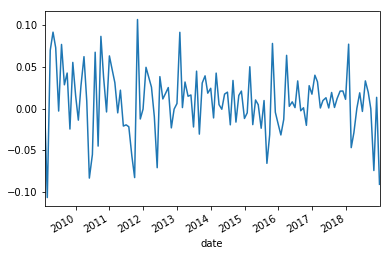

In [20]:
#check
sp500['return'].plot(kind = 'line')

In [38]:
#check
from datetime import datetime, timedelta
sp500.index = sp500.index+timedelta(days=-29)


,market cap,previousday,return
date,,,
2008-12-31,9.003733e+09,0.000000e+00,0.000000
2009-01-28,8.042979e+09,9.003733e+09,-0.106706
2009-03-01,8.607244e+09,8.042979e+09,0.070156
2009-03-31,9.398143e+09,8.607244e+09,0.091888
2009-04-29,1.008592e+10,9.398143e+09,0.073183
2009-05-31,1.005713e+10,1.008592e+10,-0.002855
2009-07-01,1.083277e+10,1.005713e+10,0.077123
2009-08-01,1.114341e+10,1.083277e+10,0.028677
2009-08-31,1.162009e+10,1.114341e+10,0.042777


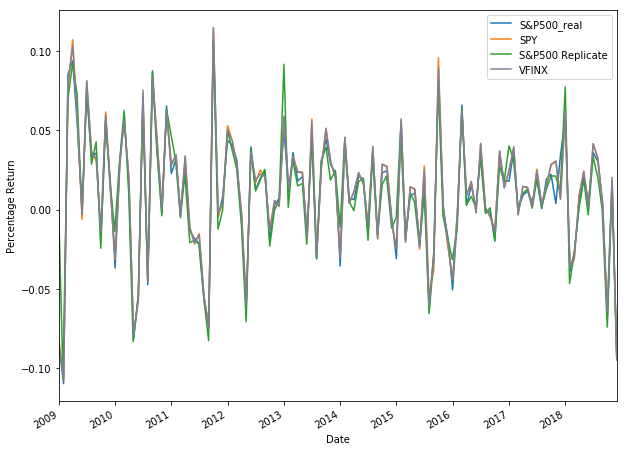

In [39]:
#read in sp500 real data
sp500real = pd.read_csv('S&P500.csv')
sp500real['Date'] = pd.to_datetime(sp500real['Date'])

#read in ETF
spy = pd.read_csv('SPY.csv')
spy['Date'] = pd.to_datetime(spy['Date'])

#read in Mutual funds
vfinx = pd.read_csv('VFINX.csv')
vfinx['Date'] = pd.to_datetime(vfinx['Date'])

# Set 'Date' as the index
sp500real.set_index('Date', inplace = True)
spy.set_index('Date', inplace = True)
vfinx.set_index('Date', inplace = True)

#plot four graphs 
fig= plt.figure(figsize=(10,8))
sp500real['Return'].plot(label='S&P500_real')
spy['Return'].plot(label='SPY')
sp500['return'].plot(label='S&P500 Replicate')
vfinx['Return'].plot(label='VFINX',color=(0.5, 0.5, 0.6, 1))


#show graph
ylabel('Percentage Return')
legend(loc='best')
show()


In [23]:
#create sdv for sp500real and sp500replicated
import copy
#get a copy of sp500 with number as index 
#create new data frame that contains only the return from 
sp500real['Return'] = sp500real['Return'].fillna(0)
df_stv = copy.deepcopy(sp500real)
lst1 = []
len(df_stv)
for i in range(0,121):
    lst1.append(i)
df_stv['idx'] = lst1
df_stv = df_stv.set_index('idx')
df_stv = df_stv[['Return']]

#get a copy of sp500 rep with number as index
sp_rep = copy.deepcopy(sp500)
lst2 = []
for i in range(0,120):
    lst2.append(i)
sp_rep['idx'] = lst2
sp_rep = sp_rep.set_index('idx')
sp_rep = sp_rep[['return']]

#10 year
df_stv['rep return'] = sp_rep['return']
df_stv['difference']= (df_stv['Return'] - df_stv['rep return'])
standard_deviation_10y = df_stv['difference'].std() 
print 'standard deviation for 10 years', standard_deviation_10y

#10 year return

print sp500['market cap'].head()
print sp500['market cap'].tail()

standard deviation for 10 years 0.0542615204452
date
2009-01-30    9.003733e+09
2009-02-27    8.042979e+09
2009-03-31    8.607244e+09
2009-04-30    9.398143e+09
2009-05-29    1.008592e+10
Name: market cap, dtype: float64
date
2018-08-31    2.909412e+10
2018-09-28    2.908794e+10
2018-10-31    2.692832e+10
2018-11-30    2.729496e+10
2018-12-31    2.481601e+10
Name: market cap, dtype: float64


In [24]:
# standard deviation by year

yearly_stv= []
#every year 
difference = df_stv['difference']
difference = difference[:120]
for i in range(0,len(difference),12):
    listA = [difference[i],difference[i+1],difference[i+2],difference[i+3],difference[i+4],difference[i+5],\
            difference[i+6],difference[i+7],difference[i+8],difference[i+9],difference[i+10],difference[i+11]]
    dev = numpy.std(listA)
    yearly_stv.append(dev)

print yearly_stv



[0.06753585245260164, 0.07795434905330267, 0.06622374373686161, 0.042101033748628704, 0.047361837941471086, 0.03863363612742018, 0.0592648705088939, 0.03626400732331704, 0.01567146355856711, 0.05708404863808165]


In [25]:
sp500real

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2008-12-31,890.590027,910.320007,889.669983,903.250000,903.250000,4.172940e+09,0.000000
2009-01-01,902.989990,943.849976,804.299988,825.880005,825.880005,1.120910e+11,-0.085657
2009-02-01,823.090027,875.010010,734.520020,735.090027,735.090027,1.244920e+11,-0.109931
2009-03-01,729.570007,832.979980,666.789978,797.869995,797.869995,1.618440e+11,0.085404
2009-04-01,793.590027,888.700012,783.320007,872.809998,872.809998,1.388550e+11,0.093925
2009-05-01,872.739990,930.169983,866.099976,919.140015,919.140015,1.316150e+11,0.053081
2009-06-01,923.260010,956.229980,888.859985,919.320007,919.320007,1.126530e+11,0.000196
2009-07-01,920.820007,996.679993,869.320007,987.479980,987.479980,1.066360e+11,0.074142
2009-08-01,990.219971,1039.469971,978.510010,1020.619995,1020.619995,1.160590e+11,0.033560
